Σιώτης Κωνσταντίνος

ΑΜ: 1115201700140

# 2η Εργασία: Μέθοδοι μείωσης διαστάσεων

## Ερώτημα 1: Προ-επεξεργασία, μείωση διαστάσεων, και οπτικοποίηση και ταξινόμηση εικόνων

### Ι. loadImages(path)

In [83]:
import cv2
import numpy as np
import glob

imageSize = 50

def loadImages(inputDir):
  seasons = []
  images = []
  data = []
  files = glob.glob(inputDir+'*.jpg')
  for file in files:
    # load images in memory and resize them
    resizedImage = cv2.resize(cv2.imread(file), (imageSize,imageSize))
    #reorder colors to preffered order
    RGB_img = cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB)

    #reshape image data to wanted dimentions
    reshapedImage = np.reshape(RGB_img, (-1,1))
    #add to list
    images.append(reshapedImage)

    #create seasons list
    for char in file:
      if char=='W':
        seasons.append(0)
        break;
      if char=='F':
        seasons.append(1)
        break;
      if char=='S':
        seasons.append(2)
        break;
  
  #turn list to table
  images = np.concatenate(images, axis=1)

  return images, seasons

In [84]:
from google.colab import drive
drive.mount('/content/drive')

images,seasons = loadImages('/content/drive/MyDrive/Data/images/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### ΙΙ. PCA_ImageSpaceVisualization(Χ)

#### PCA class decleration

In [85]:
class PCA:
  def getScatterMatrix(self,Data):
    means = np.mean(Data, axis=0)
    scatterMat = np.zeros((self.dim,self.dim))
    for row in Data:
      scatterMat += (row - means).dot((row - means).T)
    return scatterMat

  def __init__(self,N):
    self.elements = N
    
  def fit(self,Data):
    self.dim = Data.shape[1]
    return self

  def transform(self,Data):
    #get scatter matrix
    scatterMat = self.getScatterMatrix(Data)

    #calculate all eigenvalues and eigenvectors
    eigValue,eigVector = np.linalg.eigh(scatterMat)
    
    #collect wanted eigenvectors
    aDict={}
    selectededEigenVectors=[]
    for a in zip(eigValue, eigVector):
      aDict[abs(a[0])]=a[1]

    n=0
    for aKey in sorted(aDict,reverse=True): ## sort by the key
      n+=1
      # print (aKey, aDict[aKey])
      selectededEigenVectors+=[aDict[aKey]] ## select the eigenvectors
      if n==self.elements:
        break

    w=np.vstack(selectededEigenVectors)

    newData = w.dot(Data.T)
    
    return newData

#### main function definition and call

In [86]:
from matplotlib import pyplot as plt
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def imscatter(x, y, images, imageDim, ax=None):
  if ax is None:
      ax = plt.gca()
  artists = []
  for x0, y0, image in zip(x, y, images):
    im = OffsetImage(np.reshape(image, (imageDim,imageDim,3)))
    ab = AnnotationBbox(im, (x0, y0))
    artists.append(ax.add_artist(ab))
  ax.update_datalim(np.column_stack([x, y]))
  # ax.autoscale()
  return artists


def PCA_ImageSpaceVisualization(images, dim):
  pca = PCA(2)
  components = pca.fit(images).transform(images)

  x = components[1]
  y = components[0]
  fig, ax = plt.subplots(figsize=(15,8))
  imscatter(x, y, images, dim, ax=ax)
  ax.plot(x, y, linestyle='None')
  plt.axis('off')
  plt.show()
  return components

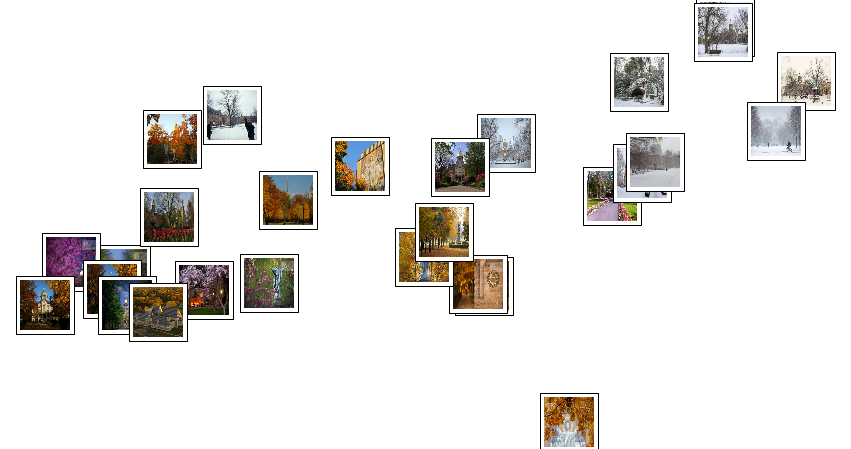

In [87]:
comp = PCA_ImageSpaceVisualization(images.T,imageSize)

with sklearn PCA

In [88]:
import cv2
import numpy as np
import glob

def sk_loadImages(inputDir):
  seasons = []
  images = []
  data = []
  files = glob.glob(inputDir+'*.jpg')
  for file in files:
    # load images in memory and resize them
    resizedImage = cv2.resize(cv2.imread(file), (100,100))
    #reorder colors to preffered order
    RGB_img = cv2.cvtColor(resizedImage, cv2.COLOR_BGR2RGB)

    #reshape image data to wanted dimentions
    reshapedImage = np.reshape(RGB_img, (-1,1))
    #add to list
    images.append(reshapedImage)

    #create seasons list
    for char in file:
      if char=='W':
        seasons.append(0)
        break;
      if char=='F':
        seasons.append(1)
        break;
      if char=='S':
        seasons.append(2)
        break;
  
  #turn list to table
  images = np.concatenate(images, axis=1)

  return images, seasons

images100,seasons = sk_loadImages('/content/drive/MyDrive/Data/images/')

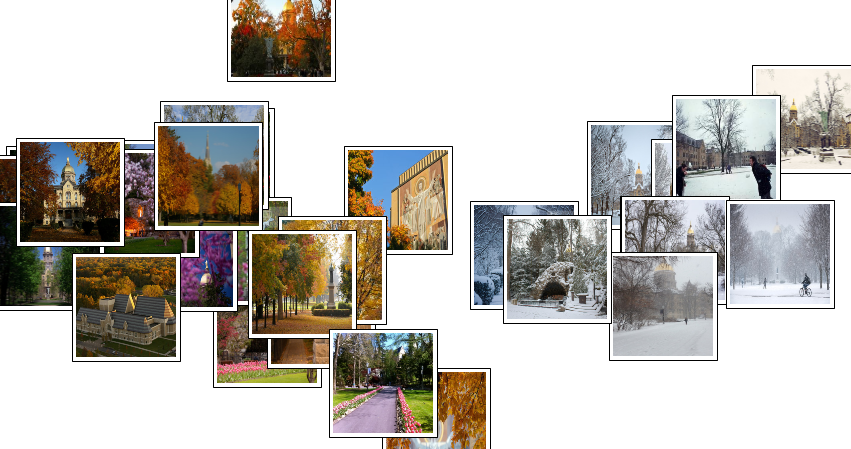

In [89]:
from sklearn.decomposition import PCA as skPCA

def imscatter(x, y, images, imageDim, ax=None):
  if ax is None:
      ax = plt.gca()
  artists = []
  for x0, y0, image in zip(x, y, images):
    im = OffsetImage(np.reshape(image, (100,100,3)))
    ab = AnnotationBbox(im, (x0, y0))
    artists.append(ax.add_artist(ab))
  ax.update_datalim(np.column_stack([x, y]))
  # ax.autoscale()
  return artists

def sk_PCA_ImageSpaceVisualization(images, dim):
  pca = skPCA(2)
  components = pca.fit(images).transform(images)

  x = components.T[0]
  y = components.T[1]
  fig, ax = plt.subplots(figsize=(15,8))
  imscatter(x, y, images, dim, ax=ax)
  ax.plot(x, y, linestyle='None')
  plt.axis('off')
  plt.show()
  return components

comp100 = sk_PCA_ImageSpaceVisualization(images100.T,100)

### ΙΙI. Τι σημαίνει όταν εικόνες βρίσκονται κοντά σε αυτό το χώρο δύο διαστάσεων που απεικονίζεται στο παραπάνω plot; Τι σημαίνει όταν εικόνες απέχουν πολύ; Μπορούμε να γενικεύσουμε αυτά τα συμπεράσματα για τον αρχικό χώρο των εικόνων ο οποίος είναι πολύ μεγάλης διάστασης;

Η απόσταση των εικόνων αντιστοιχεί σε μεγάλη η μικρή απόκλιση στις 2 διαστάσεις των δεδομένων που παρουσιάζουν τη μέγιστη διασπορά. Στις υπόλοιπες διαστάσεις οι αποστάσεις ήταν σίγουρα μικρότερες αφού είχαν μικρότερη διασπορά.

### ΙV. Οι εικόνες που αντιστοιχούν σε μία από τις εποχές τείνουν να ομαδοποιούνται πιο κοντά από ότι οι υπόλοιπες; Γιατί συμβαίνει αυτό;

Αυτό συμβαίνει επειδή οι 2 διαστάσεις των δεδομένων που παρουσιάζουν τη μέγιστη διασπορά αντιστοιχούν σε 2 μονοχρωματικά πίξελ, και έτσι τείνουν να παρατηρούνται αρκετά έντονες αποστάσεις ανάμεσα σε εικόνες με θερμά χρώματα όπως του φθινοπόρου και της άνοιξης, και τα ψυχρά χρώματα του χειμώνα. Επιπλέον, η άνοιξη έχει πιο έντονα τα πράσινα χρώματα από το φθινόπορο που συμβάλλει στον διαχωρισμό τους, που ωστόσο δεν είναι τόσο μεγάλος όσο με τον χειμώνα. Παράλληλα οι εικόνες που ανήκουν  στην ίδια εποχή έχουν παρόμοια χρώματα και γι'αυτό και εμφανίζονται σε κοντινές θέσεις.

### V. 1-NN vs 3-NN

#### V.1 Χρησιμοποιείστε 5-fold cross validation και αναφέρετε τη μέση ακρίβεια ταξινόμησης για τους δύο ταξινομητές τόσο για τα αρχικά δεδομένα μεγάλης διάστασης όσο και για τα χαρακτηριστικά χαμηλής διάστασης που εξάγετε με τη χρήση PCA .

##### Classification for full data 

In [90]:
#shuffle
p = np.random.permutation(30)

X = images100.T[p]
Y = np.array(seasons)[p]
X_reduced = comp100[p]
Y_reduced = np.array(seasons)[p]

In [91]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import cross_val_score

k_1_nn = KNN(1)
k_1_nn.fit(X, Y)

scores_1 = cross_val_score(k_1_nn, X, Y, cv=5, scoring='accuracy')

print('1 Nearest Neighbour Classification accuracy scores:',scores_1)
print('Average accuracy:',np.mean(scores_1))

1 Nearest Neighbour Classification accuracy scores: [0.5        0.83333333 0.66666667 1.         1.        ]
Average accuracy: 0.8


In [92]:
k_3_nn = KNN(3)
k_3_nn.fit(X, Y)

scores_3 = cross_val_score(k_3_nn, X, Y, cv=5, scoring='accuracy')

print('3 Nearest Neighbour Classification accuracy scores:',scores_3)
print('Average accuracy:',np.mean(scores_3))

3 Nearest Neighbour Classification accuracy scores: [0.66666667 0.66666667 0.5        1.         0.66666667]
Average accuracy: 0.7


##### Classification for reduced dimentions 

In [93]:
k_1_nn.fit(X_reduced, Y_reduced)

scores_reduced_1 = cross_val_score(k_1_nn, X_reduced, Y_reduced, cv=5, scoring='accuracy')

print('1 Nearest Neighbour Classification accuracy scores for reduced data:',scores_reduced_1)
print('Average accuracy:',np.mean(scores_reduced_1))

1 Nearest Neighbour Classification accuracy scores for reduced data: [0.66666667 0.66666667 0.5        0.83333333 0.66666667]
Average accuracy: 0.6666666666666666


In [94]:
k_3_nn.fit(X_reduced, Y_reduced)

scores_reduced_3 = cross_val_score(k_3_nn, X_reduced, Y_reduced, cv=5, scoring='accuracy')

print('1 Nearest Neighbour Classification accuracy scores for reduced data:',scores_reduced_3)
print('Average accuracy:',np.mean(scores_reduced_3))

1 Nearest Neighbour Classification accuracy scores for reduced data: [0.66666667 0.66666667 0.5        0.83333333 0.5       ]
Average accuracy: 0.6333333333333333


#### V.2 Πώς θα προσδιορίσετε τη διάσταση των χαρακτηριστικών που θα εξάγετε μέσω της PCA.

Κρίνουμε με βάση το ποσοστό τον αριθμό των ιδιοδιανυσμάτων που θα επιλεγούν. 

__________________________________
## Ερώτημα 2: Κανονικοποιημένη μη-αρνητική παραγοντοποίηση πινάκων

Έστω το παρακάτω πρόβλημα βελτιστοποίησης για την κανονικοποιημένη μη-αρνητική παραγοντοποίηση πινάκων (regularized non-negative matrix factorization -regNMF): 
$$\min_{A,B}||X-AB||_F^2+\lambda||A||_F^2\ s.t.A\geq0,B\geq0$$

### I. Να εξάγετε αναλυτικά βήμα προς βήμα με το χέρι, τους πολλαπλασιαστικούς κανόνες ανανέωσης (multiplicative update rules) των μεταβλητών Α και B, παραθέτοντας όλα τα ενδιάμεσα βήματα.

Έστω 
$$
  f(A,B)=||X-AB||_F^2+\lambda||A||_F^2=\\
  tr([X-AB]^T[X-AB])+\lambda\cdot tr(A^TA)=\\
  tr([X^T-B^TA^T][X-AB])+\lambda\cdot tr(A^TA)=\\
  tr(X^TX)-tr(X^TAB)-tr(B^TA^TX)+tr(B^TA^TAB)+\lambda\cdot tr(A^TA)
$$
\
Θα εξετάσουμε στην παραπάνω σχέση τις παραγώγους ως προς τα Α και Β (θα χρησιμοποιηθούν οι ιδιότητες από το Matrix Cookbook, 2.5 Derivatives of Traces): 
$$
  \frac{\partial}{dB}(||X-AB||_F^2+\lambda||A||_F^2)=\\
  \frac{\partial}{dB}tr(X^TX)-\frac{\partial}{dB}tr(X^TAB)-\frac{\partial}{dB}tr(B^TA^TX)+\frac{\partial}{dB}tr(B^TA^TAB)+\lambda\frac{\partial}{dB}tr(A^TA)=\\
  0-A^TX-A^TX+A^TAB+A^TAB+\lambda\cdot0=\\
  2A^T(AB-X)
$$
\
$$
  \frac{\partial}{dA}(||X-AB||_F^2+\lambda||A||_F^2)=\\
  \frac{\partial}{dA}tr(X^TX)-\frac{\partial}{dA}tr(X^TAB)-\frac{\partial}{dA}tr(B^TA^TX)+\frac{\partial}{dA}tr(B^TA^TAB)+\lambda\frac{\partial}{dA}tr(A^TA)=\\
  0-XB^T-XB^T+ABB^T+ABB^T+\lambda2A=\\
  2(AB-X)B^T+2\lambda A
$$
\
Σε κάθε βήμα του αλγορίθμου βελτιστοποίησης κρατάμε σταθερή τη μία μεταβλητή
και τροποποιούμε την άλλη ανάλογα την κλήση της συνάρτησης (αρνητική
κατεύθυνση της παραγώγου της συνάρτησης) στο τρέχον σημείο.

Αρχικοποιήση: Αρχικοποιούμε τις άγνωστες μεταβλητές A και B με τυχαίες μη-
αρνητικές τιμές.

Σε κάθε βήμα της επανάληψης εκτελούνται τα ακόλουθα:

$$
  B\leftarrow B-n\frac{\partial}{dB}f(A,B)\\
  A\leftarrow A-n\frac{\partial}{dA}f(A,B)
$$
όπου n το learning rate.

θέτοντας το n για το πρώτο βήμα ως
$$
  n=\frac{B}{2A^TAB}
$$
και για το δεύτερο ως
$$
  n=\frac{A}{2ABB^T+2\lambda A}
$$
οι παραπάνω αναθέσεις γίνονται:\
$$
  B\leftarrow B-\frac{B}{2A^TAB}\frac{\partial}{dB}f(A,B)\\
  B\leftarrow B-\frac{B}{2A^TAB}*2A^TAB+\frac{B}{2A^TAB}*2A^TX)\\
  B\leftarrow B*\frac{2A^TX}{2A^TAB}
$$
\
$$
  A\leftarrow A-\frac{A}{2ABB^T+2\lambda A}\frac{\partial}{dA}f(A,B)\\
  A\leftarrow A-\frac{A}{2ABB^T+2\lambda A}*(2ABB^T+2\lambda A)+\frac{A}{2ABB^T+2\lambda A}*2XB^T\\
  A\leftarrow A*\frac{XB^T}{ABB^T+\lambda A}
$$

### II. RegNMF(X,k,lambda,epsilon)

In [95]:
import numpy as np
from numpy.random import RandomState

def abs(val):
  if val < 0:
    ret = -val
  else:
    ret = val
  return ret

apply_abs = np.vectorize(abs)

def randPosMatrix(x,y):
  myarray = np.random.randint(0,100,size=(x,y))
  # myarray = np.random.rand(x, y)
  return apply_abs(myarray)

def error(X,A,B):
  upper = X-np.matmul(A,B)
  upper = np.linalg.norm(upper, 'fro')
  return upper/np.linalg.norm(X, 'fro')


def RegNMF(X,k,l,epsilon):
  d = X.shape[0]
  N = X.shape[1]

  set_random_state = RandomState(1234567890)
  A = set_random_state.rand(d, k)
  B = set_random_state.rand(k, N)

  #initial state
  curr_error = error(X,A,B)
  prev_error = curr_error + 10 * epsilon
  i = 0
  while abs(curr_error-prev_error) > epsilon: #iteration
    i += 1
    #update B
    AT2 = 2*A.T
    B = B*np.divide(np.matmul(AT2,X),np.matmul(AT2,np.matmul(A,B)))
    B = apply_abs(B)
    
    #update A
    upper = np.matmul(X,B.T)
    lower = np.matmul(np.matmul(A,B),B.T)+l*A
    A = A*np.divide(upper, lower)
    A = apply_abs(A)

    #update errors
    prev_error = curr_error
    curr_error = error(X,A,B)

  print('iterations:',i)
  return A,B
  

In [96]:
allk = [5,10,50,100]
e = [0.1,0.01,0.001,0.0001]
u = randPosMatrix(500,500)

for k in allk:
  for epsilon in e:
    print('k=',k,'epsilon=',epsilon)
    A,B = RegNMF(u,k,0.5,epsilon)
    # print(A,B)
    print()

k= 5 epsilon= 0.1
iterations: 2

k= 5 epsilon= 0.01
iterations: 2

k= 5 epsilon= 0.001
iterations: 7

k= 5 epsilon= 0.0001
iterations: 32

k= 10 epsilon= 0.1
iterations: 2

k= 10 epsilon= 0.01
iterations: 2

k= 10 epsilon= 0.001
iterations: 4

k= 10 epsilon= 0.0001
iterations: 58

k= 50 epsilon= 0.1
iterations: 2

k= 50 epsilon= 0.01
iterations: 2

k= 50 epsilon= 0.001
iterations: 2

k= 50 epsilon= 0.0001
iterations: 132

k= 100 epsilon= 0.1
iterations: 2

k= 100 epsilon= 0.01
iterations: 2

k= 100 epsilon= 0.001
iterations: 2

k= 100 epsilon= 0.0001
iterations: 162

